MainProcess


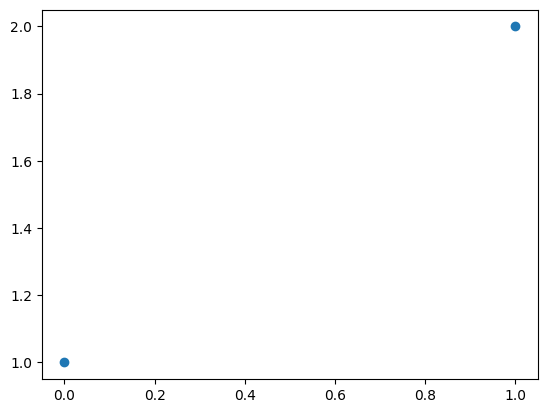

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
N_test_negative = 50
N_test_positive = 300
all_data = fls.load_all_train_data() + fls.load_all_extra_data()
np.random.default_rng(seed=0).shuffle(all_data)
n_motors = np.array([len(d.labels) for d in all_data])
inds_zero = np.argwhere(n_motors==0)[:N_test_negative,0]
inds_one = np.argwhere(n_motors==1)[:N_test_positive,0]
inds_test = np.concatenate((inds_zero,inds_one))
inds_train = np.setdiff1d(np.arange(len(n_motors)), inds_test)
train_data = []
for i in inds_train:
    train_data.append(all_data[i])
test_data = []
for i in inds_test:
    test_data.append(all_data[i])        
print(len(train_data), len(test_data))

1581 350


In [ ]:
highest_false_score = []
real_score = []
data_list = []
for i_type in range(4):
    model = flg_model.ThreeStepModelLabelBased()   
    model.step1Labels.remove_suspect_areas = False 
    model.seed = 207158
    #model.step1Labels.n_epochs = 2
    #m.step2Motors.distance_threshold = 10.
    if i_type == 0:
        # no negative labels
        model.step1Labels.negative_label_threshold = 1.
        model.step1Labels.negative_slice_ratio = 0.1             
    elif i_type==1:
        # baseline
        pass   
    elif i_type==2:
        # less negative
        model.step1Labels.trust_neg = 0        
    elif i_type==3:
        # remove suspect areas
        model.step1Labels.remove_suspect_areas = True  
    model.step1Labels.relative_confidence_threshold = 0.01
    model.run_in_parallel = False   
    model_file = fls.temp_dir + 'model_comp_' + str(i_type) + '.pickle'
    if not os.path.isfile(model_file):
        model.train(train_data, test_data)
        fls.dill_save(model_file, model)
    model = fls.dill_load(model_file)
    #model = fls.dill_load(fls.temp_dir + 'model_' + str(i_type) + '.pickle')
    data_file = fls.temp_dir + 'data_comp_' + str(i_type) + '.pickle'
    if not os.path.isfile(data_file):        
        inferred_data = model.infer(test_data)
        fls.dill_save(data_file, inferred_data)
    inferred_data = fls.dill_load(data_file)    
    for d in inferred_data:
        d.labels_unfiltered = d.labels_unfiltered2
    fls.mark_tf_pn(inferred_data, test_data)
    data_list.append(inferred_data)
    this_highest_false_score = []
    this_real_score = []
    for i,r in zip(inferred_data, test_data):
        false_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==1.]
        if len(false_positives)>0:
            this_highest_false_score.append(np.max(false_positives['confidence']))
        else:
            this_highest_false_score.append(0)
        if len(r.labels)>0:
            true_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==0.]
            if len(true_positives)>0:
                this_real_score.append(np.max(true_positives['confidence']))
            else:
                this_real_score.append(0)
    highest_false_score.append(this_highest_false_score)
    real_score.append(this_real_score)


CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/531 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/113 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 531 tomograms, 0 motors, 0 slices
- Validation data: 113 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, cop

train: Scanning /flagellar/temp/yolo_dataset/labels/train... 4618 images, 2078 backgrounds, 9 corrupt: 100%|██████████| 4618/4618 [00:01<00:00, 2482.56it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

train: New cache created: /flagellar/temp/yolo_dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1972.9±958.2 MB/s, size: 108.6 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 1027 images, 468 backgrounds, 0 corrupt: 100%|██████████| 1027/1027 [00:00<00:00, 2582.89it/s]


val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache
Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.77G      3.129      7.917      1.261          0        640: 100%|██████████| 385/385 [00:41<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 17.62it/s]

                   all       1027        559      0.331      0.462      0.282     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.12G      2.536      2.255      1.075          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.57it/s]

                   all       1027        559      0.606      0.555      0.595      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.12G      2.402      2.124       1.05          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.50it/s]

                   all       1027        559       0.65      0.653      0.659      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.12G      2.321      2.093      1.035          0        640: 100%|██████████| 385/385 [00:33<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.39it/s]


                   all       1027        559       0.76      0.704      0.752      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.12G      2.222      1.921       1.01          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.86it/s]

                   all       1027        559       0.69      0.623      0.703      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.12G      2.147      1.779     0.9989          1        640: 100%|██████████| 385/385 [00:33<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.61it/s]

                   all       1027        559      0.751      0.762      0.793      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.12G      2.075      1.732     0.9867          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.49it/s]

                   all       1027        559      0.798      0.769      0.833      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.12G      2.065      1.683     0.9819          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.57it/s]

                   all       1027        559       0.84      0.746      0.848      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.12G      1.994      1.584     0.9714          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.33it/s]

                   all       1027        559      0.843      0.786      0.857      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.12G      1.966      1.546      0.962          0        640: 100%|██████████| 385/385 [00:33<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.55it/s]


                   all       1027        559      0.848      0.805      0.858      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.12G      1.947      1.562     0.9641          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.50it/s]

                   all       1027        559      0.893      0.841      0.906      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.12G      1.898      1.484     0.9533          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.69it/s]

                   all       1027        559       0.88      0.826      0.871      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.12G      1.866      1.421     0.9421          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.37it/s]

                   all       1027        559      0.901      0.842       0.91      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.12G      1.875      1.447     0.9521          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.82it/s]

                   all       1027        559      0.922      0.767      0.891      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.12G       1.79      1.365     0.9368          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.33it/s]

                   all       1027        559      0.863       0.81      0.887      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.12G       1.78      1.389     0.9261          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.53it/s]

                   all       1027        559      0.907      0.844      0.916      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.12G      1.769      1.292     0.9295          4        640: 100%|██████████| 385/385 [00:33<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.75it/s]

                   all       1027        559      0.911      0.846      0.882      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.12G      1.725      1.263     0.9221          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.61it/s]

                   all       1027        559      0.902      0.835      0.877      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.12G      1.688      1.247     0.9155          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.69it/s]

                   all       1027        559       0.92       0.88      0.918      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.12G      1.694      1.275      0.912          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.27it/s]

                   all       1027        559      0.941      0.868      0.926      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.12G      1.676      1.245     0.9012          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.63it/s]

                   all       1027        559      0.942      0.893      0.939      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.12G      1.694      1.227     0.9145          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.81it/s]

                   all       1027        559      0.938      0.857      0.916      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.12G      1.631      1.164     0.8972          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.24it/s]


                   all       1027        559      0.928      0.886      0.933       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.12G      1.612      1.144     0.8996          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.30it/s]


                   all       1027        559      0.897      0.872       0.92      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.12G      1.601      1.152     0.8977          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.18it/s]

                   all       1027        559      0.922      0.807      0.879      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.12G      1.558      1.112     0.8861          0        640: 100%|██████████| 385/385 [00:35<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.75it/s]

                   all       1027        559      0.961       0.81      0.923      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.12G      1.511      1.085     0.8787          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.40it/s]

                   all       1027        559      0.925      0.862       0.93      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.12G      1.548      1.097     0.8919          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.23it/s]

                   all       1027        559       0.92       0.88      0.946      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.12G      1.503      1.036     0.8798          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.27it/s]

                   all       1027        559      0.924      0.816      0.891      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.12G      1.464      1.024     0.8726          0        640: 100%|██████████| 385/385 [00:35<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.47it/s]

                   all       1027        559      0.958      0.851      0.926      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.12G      1.442      1.013     0.8732          2        640: 100%|██████████| 385/385 [00:34<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.28it/s]

                   all       1027        559      0.956      0.894      0.947      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.12G      1.446      1.027     0.8743          3        640: 100%|██████████| 385/385 [00:35<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.17it/s]

                   all       1027        559       0.94      0.887      0.948      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.12G      1.408     0.9867     0.8674          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.41it/s]

                   all       1027        559      0.957      0.884      0.948      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.12G      1.409     0.9746     0.8723          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.38it/s]

                   all       1027        559      0.952       0.88      0.952      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.12G      1.378     0.9456     0.8674          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 18.77it/s]

                   all       1027        559      0.912      0.887      0.949      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.12G      1.352     0.9209     0.8626          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.46it/s]


                   all       1027        559      0.946      0.866      0.939      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.12G      1.345     0.9145      0.864          4        640: 100%|██████████| 385/385 [00:34<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.52it/s]

                   all       1027        559      0.936      0.885       0.95      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.12G      1.305     0.8673      0.854          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.84it/s]

                   all       1027        559      0.953      0.871      0.944      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.12G      1.308      0.906     0.8547          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.72it/s]

                   all       1027        559      0.944      0.862      0.937      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.12G      1.284      0.853     0.8554          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.26it/s]

                   all       1027        559      0.945      0.866      0.937      0.542


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.12G      1.048     0.5909     0.8356          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.41it/s]

                   all       1027        559      0.968      0.864      0.947      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.12G     0.9911     0.5674     0.8275          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.78it/s]

                   all       1027        559      0.933      0.898      0.951      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.12G     0.9924     0.5595     0.8265          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.80it/s]

                   all       1027        559      0.916      0.914      0.951      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.12G     0.9412     0.5422     0.8228          1        640: 100%|██████████| 385/385 [00:35<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.97it/s]

                   all       1027        559      0.927      0.903      0.945      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.12G     0.9518     0.5284     0.8227          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.60it/s]

                   all       1027        559      0.915      0.911      0.943      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.12G     0.9324     0.5317     0.8223          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.97it/s]

                   all       1027        559      0.957      0.875      0.942      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.12G     0.9329     0.5354     0.8257          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.91it/s]

                   all       1027        559      0.962      0.871      0.946      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.12G     0.9128     0.5134     0.8276          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 20.19it/s]

                   all       1027        559      0.955      0.871      0.946      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.12G      0.901     0.5143     0.8209          0        640: 100%|██████████| 385/385 [00:34<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.87it/s]

                   all       1027        559      0.967      0.869      0.947      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.12G     0.9011     0.5103     0.8217          1        640: 100%|██████████| 385/385 [00:34<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:02<00:00, 19.83it/s]

                   all       1027        559      0.926        0.9      0.946      0.556



50 epochs completed in 0.522 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 15.2MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 15.2MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:03<00:00, 11.14it/s]


                   all       1027        559      0.931      0.873      0.937      0.528
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
       z    y    x  confidence
0    564  806  439    0.178955
1    524  805  466    0.122498
2    151  412  558    0.072632
3    389  299  711    0.060303
4    100  782  893    0.046906
..   ...  ...  ...         ...
104  115    7  349    0.001957
105  158  789  800    0.001912
106  269  846  524    0.001867
107  153  646  963    0.001846
108  172    8  562    0.001831

[109 rows x 4 columns]

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0d9b6 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
      z    y    x  confidence
0 

In [ ]:
for d in data_list:
    n_corr=0
    n_total=0
    for i,r in zip(d,test_data):
        if len(r.labels)>0:# and 'tom' in r.name:
            n_total+=1
            ind = np.argmax(i.labels_unfiltered['confidence'])
            if (i.labels_unfiltered['tf_pn'].tolist()[ind])==0.:
                n_corr += 1
    print(n_corr/n_total)
    #print(i.labels_unfiltered)

In [ ]:
i_baseline = 1; i_new = 3;

In [ ]:
plt.scatter(highest_false_score[i_baseline], highest_false_score[i_new])
plt.xlabel('Highest false score baseline')
plt.ylabel('Highest false score new')
plt.grid(True)
plt.axline((0,0),slope=1)

In [ ]:
plt.scatter(real_score[i_baseline], real_score[i_new])
plt.xlabel('True score baseline')
plt.ylabel('True score new')
plt.grid(True)
plt.axline((0,0),slope=1)

In [ ]:
xx=(np.argwhere(np.logical_and(np.array(real_score[i_baseline])>0., np.array(real_score[i_new])<0.4))).flatten()
xx

In [ ]:
#cur_id = 87
cur_id = 0
for ii in range(len(test_data)):
    if len(test_data[ii].labels)>0:     
        if cur_id in xx:
            print(test_data[ii].name,ii,real_score[i_baseline][cur_id],real_score[i_new][cur_id])
        cur_id+=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([highest_false_score[i_baseline], highest_false_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(highest_false_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(highest_false_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of Highest False Scores - lower is better (we want to see orange)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([real_score[i_baseline], real_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(real_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(real_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of True Scores - higher is better (we want to see blue)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def visualize_fp_fn(data, threshold_fp, threshold_fn):

    all_data = fls.load_all_train_data() + fls.load_all_extra_data()
    def visualize_slice(name, z,y,x, color, title_str):
        for d in all_data:
            if d.name == name:
                break
        else:
            raise 'Not found'
        d = copy.deepcopy(d)
        prep = flg_preprocess.Preprocessor2()
        prep.load_and_preprocess(d, desired_original_slices = [z])

        plt.figure()
        plt.imshow(d.data[0,:,:], cmap='bone')
        plt.colorbar()
        plt.title(title_str + ': ' + name + ', ' + str(z))

        plt.scatter([x*d.resize_factor], [y*d.resize_factor], alpha=0.3, color=color, s=200)
    
    for d in data:  
        if not 'tom' in d.name:
            continue
        lab = copy.deepcopy(d.labels_unfiltered).reset_index()

        # false negatives
        if not np.any(np.logical_and(lab['tf_pn']==0., lab['confidence']>threshold_fn)):
            for r in all_data:
                if r.name == d.name:
                    break
            else:
                raise 'Not found'
            if len(r.labels)>0:
                attempts = lab[lab['tf_pn']==0.]
                if len(attempts)>0:
                    thresh = np.max(attempts['confidence'])
                else:
                    thresh = 0.
                visualize_slice(d.name, np.round(r.labels['z'][0]).astype(int),r.labels['y'][0],r.labels['x'][0], 'blue', 'False negative: '+str(thresh))

        # false positives
        slices_done = []
        for i_row in range(len(lab)):
            if lab['tf_pn'][i_row]==1. and lab['confidence'][i_row]>threshold_fp and lab['z'][i_row] not in slices_done:
                #print('fp', d.name, lab['z'][i_row], lab['confidence'][i_row])
                visualize_slice(d.name, lab['z'][i_row],lab['y'][i_row],lab['x'][i_row], 'red', 'False positive ' + str(lab['confidence'][i_row]))
                for ii in np.arange(lab['z'][i_row]-10, lab['z'][i_row]+11):
                    slices_done.append(ii)
#visualize_fp_fn(data_list[i_new], 0.8, 0.8)

In [ ]:
model.seed